In [1]:
#loading python packages for data analysis
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
import os, pickle
from keras.layers import LSTM
from keras.layers import Reshape
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from keras.callbacks import ModelCheckpoint 

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
#laoding & displaying dataset values
dataset = pd.read_csv("Dataset/diabetic_data.csv", na_values='?', nrows=10000)
ages = np.unique(dataset['age']).ravel
dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42801564,25911072,Caucasian,Female,[80-90),NaN,5,3,17,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
9996,42802962,19316196,Caucasian,Female,[80-90),NaN,2,18,1,4,...,No,No,No,No,No,No,No,No,No,>30
9997,42805614,19316448,Caucasian,Male,[50-60),NaN,1,18,7,14,...,No,No,No,No,No,No,No,No,No,NO
9998,42808980,987381,Caucasian,Female,[50-60),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,No,NO


In [3]:
#Dataset Exploration 
#describing dataset for each column in terms of count, mean, standard deviation etc and by uisng this we can know the
#importance of each columns
dataset.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,0.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.531255e+07,2.501453e+07,2.439200,4.631700,6.635200,4.708200,NaN,46.631200,1.476400,14.924300,0.067200,0.042600,0.471500,6.755900
std,1.171356e+07,3.303636e+07,1.838761,6.632696,4.978795,3.154433,NaN,18.247512,1.765263,7.932532,0.463363,0.426619,1.017296,2.057119
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.622375e+07,2.139876e+06,1.000000,1.000000,2.000000,2.000000,NaN,35.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.000000
50%,2.698506e+07,7.988742e+06,2.000000,1.000000,7.000000,4.000000,NaN,47.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,3.540126e+07,2.584620e+07,3.000000,6.000000,7.000000,6.000000,NaN,59.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,4.280967e+07,1.151968e+08,8.000000,25.000000,20.000000,14.000000,NaN,114.000000,6.000000,62.000000,12.000000,22.000000,15.000000,9.000000


In [4]:
#this block used to find gender count with number of admissions as less than 30 or greater than 30 times or no admission
#by using this exploration we can see different gender with number of admitted
gender_admitted = pd.DataFrame(dataset.groupby(['gender', 'readmitted']).size().reset_index())
gender_admitted.rename(columns = {0: 'Admitted Count'}, inplace = True)
gender_admitted

,gender,readmitted,Admitted Count
0,Female,<30,591
1,Female,>30,2082
2,Female,NO,2690
3,Male,<30,507
4,Male,>30,1752
5,Male,NO,2378


In [5]:
#using this block we are exploring different number of gender on diabetes medicines 
diabetes_medicine = pd.DataFrame(dataset.groupby(['gender', 'diabetesMed']).size().reset_index())
diabetes_medicine.rename(columns = {0: 'on Diabetes Medicine'}, inplace = True)
diabetes_medicine

,gender,diabetesMed,on Diabetes Medicine
0,Female,No,1428
1,Female,Yes,3935
2,Male,No,1160
3,Male,Yes,3477


In [6]:
#using this we are finding different group of ages on diabetes medicine as Yes or No
diabetes_age_group = pd.DataFrame(dataset.groupby(['age', 'diabetesMed']).size().reset_index())
diabetes_age_group.rename(columns = {0: 'Number of Ages on Diabetes Medicine'}, inplace = True)
diabetes_age_group

,age,diabetesMed,Number of Ages on Diabetes Medicine
0,[0-10),No,8
1,[0-10),Yes,61
2,[10-20),No,11
3,[10-20),Yes,167
4,[20-30),No,28
5,[20-30),Yes,135
6,[30-40),No,126
7,[30-40),Yes,321
8,[40-50),No,269
9,[40-50),Yes,812


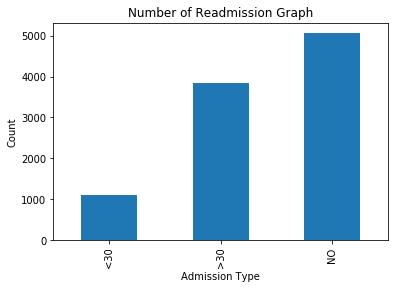

In [7]:
#DATASET VISUALIZATIONS
#finding & ploting graph of different number of admission found in dataset
labels = np.unique(dataset['readmitted'])
label = dataset.groupby('readmitted').size()
label.plot(kind="bar")
plt.rcParams["figure.figsize"]= [8,4]
plt.rcParams["figure.figsize"]= [8,4]
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.title("Number of Readmission Graph")
plt.show()

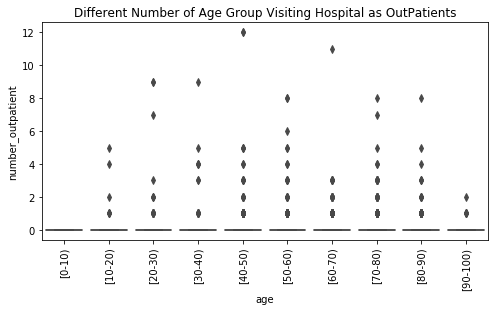

In [8]:
#in below graph we are finding number of outpatients in different age groups
plt.xticks(rotation=90)
sns.boxplot(x='age',y='number_outpatient',data=dataset,palette='rainbow')
plt.rcParams["figure.figsize"]= [8,4]
plt.title("Different Number of Age Group Visiting Hospital as OutPatients")
plt.show()

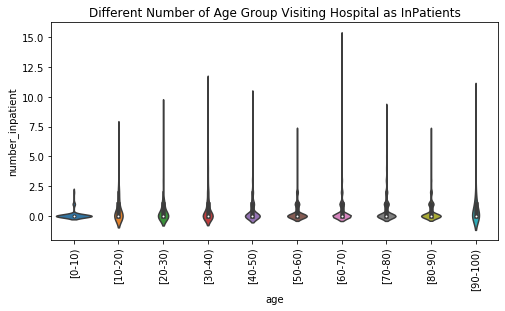

In [9]:
#finding and plotting number of inpatients based on different age groups
plt.xticks(rotation=90)
sns.violinplot(x='age',y='number_inpatient',data=dataset)
plt.title("Different Number of Age Group Visiting Hospital as InPatients")
plt.show()

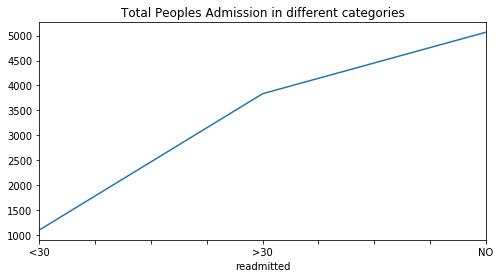

In [10]:
#plot graph of admission based on NO, >30 or less than 30 times admission
dataset.groupby(['readmitted']).size().plot(kind='line')
plt.title("Total Peoples Admission in different categories")
plt.show()

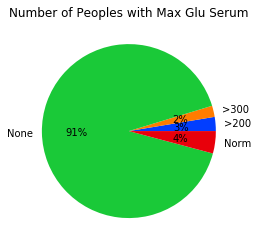

In [11]:
#finding number of patients with MAX GLU Serum and in all patients only 2% patients having serun > 300 and 3% having
#> 200 and 4% having normal serum
palette_color = sns.color_palette('bright')
names, count = np.unique(dataset['max_glu_serum'], return_counts=True)
plt.pie(count[0:20], labels=names[0:20], colors=palette_color, autopct='%.0f%%')
plt.title("Number of Peoples with Max Glu Serum")
plt.xticks(rotation=90)
plt.show()

In [12]:
#Dataset Preprocessing
#now we are dealing with missing data by finding count of missing values with each column
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                          184
gender                          0
age                             0
weight                       9725
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  10000
medical_specialty            3629
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          6
diag_2                         63
diag_3                        300
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
#this dataset contains both numeric and non-numeric data but ML algorithms accept only Numeric data so by applying
#label encoder class we are converting non-numeric data into numerci values
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric 
        label_encoder.append(le)
dataset
#in below table we can see all values are converted to numeric format

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,9,6,25,1,1,...,0,1,0,0,0,0,0,1,0,2
1,149190,55629189,2,0,1,9,1,1,7,3,...,0,3,0,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,9,1,1,7,2,...,0,1,0,0,0,0,0,1,1,2
3,500364,82442376,2,1,3,9,1,1,7,2,...,0,3,0,0,0,0,0,0,1,2
4,16680,42519267,2,1,4,9,1,1,7,1,...,0,2,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42801564,25911072,2,0,8,9,5,3,17,3,...,0,2,0,0,0,0,0,1,1,1
9996,42802962,19316196,2,0,8,9,2,18,1,4,...,0,1,0,0,0,0,0,1,0,1
9997,42805614,19316448,2,1,5,9,1,18,7,14,...,0,1,0,0,0,0,0,1,0,2
9998,42808980,987381,2,0,5,9,1,1,7,2,...,0,1,0,0,0,0,0,1,0,2


In [14]:
#now repalcing missing values with mean
dataset = dataset.apply(lambda x: x.fillna(x.mean())) 
dataset.fillna(0, inplace = True)
#again finding missing values
dataset.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

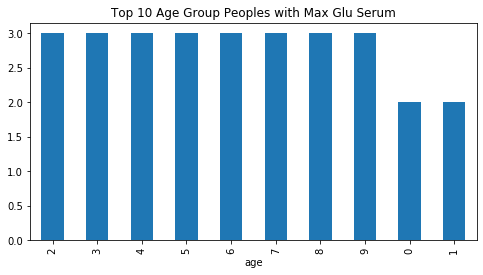

In [15]:
#plotting graph for top 10 restaurant seller in all categories
max_serum = dataset.groupby('age').agg({'max_glu_serum': 'max'})['max_glu_serum'].nlargest(10)
max_serum.plot(kind='bar')
plt.title("Top 10 Age Group Peoples with Max Glu Serum")
plt.show()



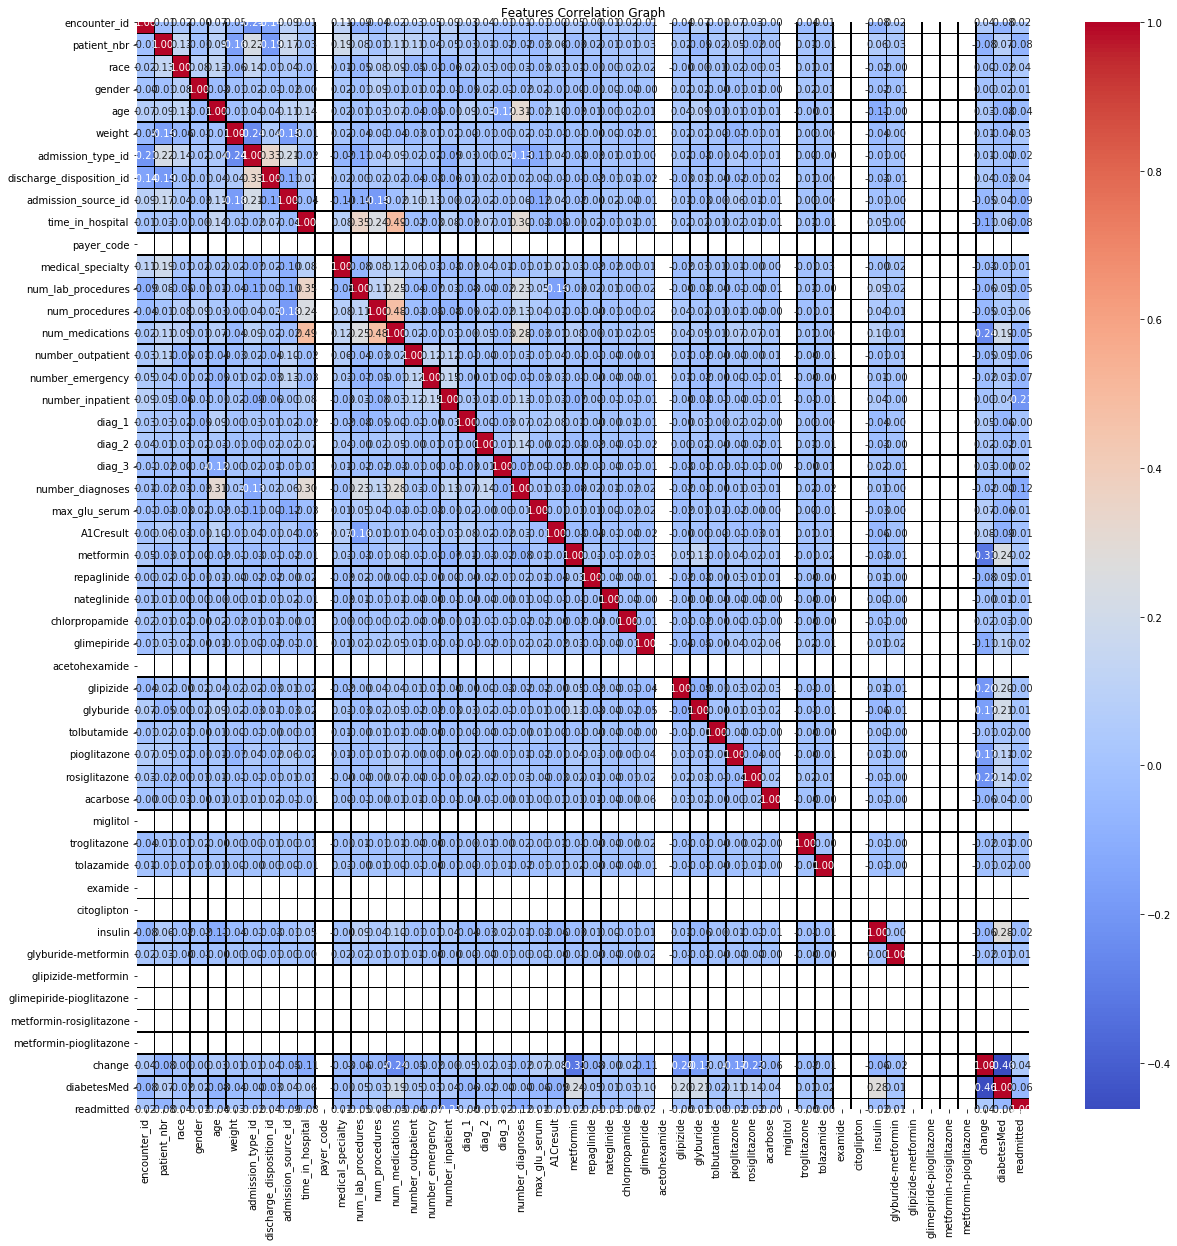

In [16]:
plt.rcParams["figure.figsize"]= [20,20]
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="coolwarm")
plt.rcParams["figure.figsize"]= [20,20]
plt.title("Features Correlation Graph")
plt.show()

In [17]:
#dataset preprocessing like normalization features selection
data = dataset.values
X = data[:,0:data.shape[1]-1] #getting X features from dataset
Y = data[:,data.shape[1]-1] #getting Y target values from dataset
print("Number of features exists in dataset : "+str(X.shape[1]))
scaler = StandardScaler()
X = scaler.fit_transform(X) #normalizing the features


Number of features exists in dataset : 49


In [18]:
#splitting dataset into train and test where application using 80% dataset for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Total records available in dataset : "+str(X.shape[0]))
print("80% training records : "+str(X_train.shape[0]))
print("20% testing records  : "+str(X_test.shape[0]))


Total records available in dataset : 10000
80% training records : 8000
20% testing records  : 2000


In [19]:
#defining global features to store accuracy and other values
plt.rcParams["figure.figsize"]= [8,4]
plt.rcParams["figure.figsize"]= [8,4]
accuracy = []
precision = []
recall = [] 
fscore = []

In [20]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(12, 6))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_tpr, ns_fpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy  : 56.85
SVM Precision : 36.28463063037372
SVM Recall    : 40.4171900473047
SVM FSCORE    : 37.788216687223965


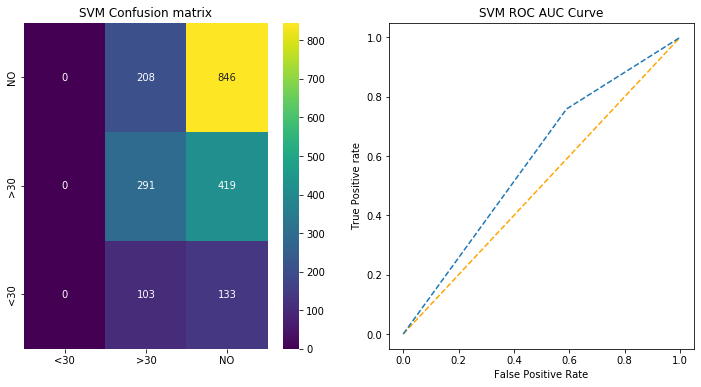

In [21]:
#training SVM with given train data and then testing using 20% test data
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", y_test, predict)

SVM-AL Accuracy  : 66.8
SVM-AL Precision : 77.05641207395594
SVM-AL Recall    : 50.856092180825385
SVM-AL FSCORE    : 51.11787572259212


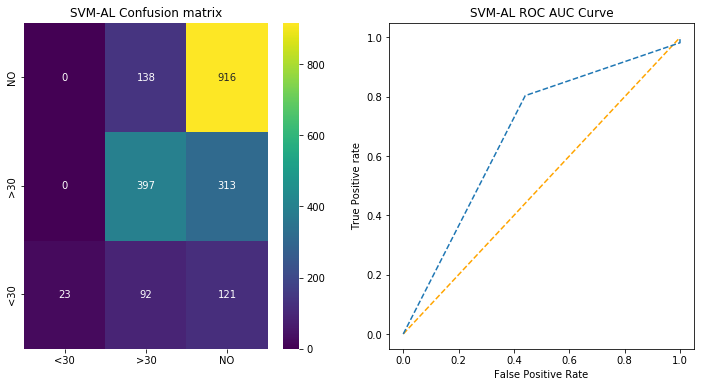

In [22]:
#now train SVM active learning with given train and test data
#SVM AL will continuously train itself and then check its accuracy and continue learning till accuracy get increase
if os.path.exists('model/svm_al.txt'):
    with open('model/svm_al.txt', 'rb') as file:
        active_learn = pickle.load(file)
    file.close()
else:
    best_model = None 
    best_acc = 0 
    for i in range(1,5): #now loop for svm training
        active_learn = svm.SVC(C=i, max_iter = 4000 * i, gamma="auto") #train svm with varied C values
        active_learn.fit(X_train, y_train) 
        predict = active_learn.predict(X_test)#test the SVM-AL algorithm
        acc = accuracy_score(y_test, predict) #calculate accuracy
        if acc > best_acc: #continue training till SVM accuracy increased
            best_acc = acc 
            best_model = active_learn 
            with open('model/svm_al.txt', 'wb') as file:
                pickle.dump(active_learn, file)
            file.close()
predict = active_learn.predict(X_test)#now perform prediction using SVM-AL best model
calculateMetrics("SVM-AL", y_test, predict)#calculate accuracy and other metrics and then plot graph

In [23]:
#now reshape all dataset values as per CNN and LSTM input dimensions
Y1 = to_categorical(Y)
X1 = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
y_train1 = to_categorical(y_train)
y_test1 =  to_categorical(y_test)
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
#defining sequential CNN object
cnn_lstm = Sequential()
#adding CNN layer wit 32 filters to optimized dataset features using 32 neurons
cnn_lstm.add(Convolution2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#adding maxpooling layer to collect filtered relevant features from previous CNN layer
cnn_lstm.add(MaxPooling2D(pool_size = (1, 1)))
#adding another CNN layer to further filtered features
cnn_lstm.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_lstm.add(MaxPooling2D(pool_size = (1, 1)))
#collect relevant filtered features
cnn_lstm.add(Flatten())
#reshape data as per LSTM layer
cnn_lstm.add(Reshape((-1, 2)))
#add LSTM layer with 8 neurons to further optimized CNN features 
cnn_lstm.add(LSTM(8))#adding lstm layer to cnn
#defining output layers
cnn_lstm.add(Dense(units = 256, activation = 'relu'))
#defining prediction layer with Y target data
cnn_lstm.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
#compile the CNN with LSTM model
cnn_lstm.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_lstm.summary())
#train and load the model
if os.path.exists("model/model_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/model_weights.hdf5', verbose = 1, save_best_only = True)
    cnn_lstm.fit(X_train1, y_train1, batch_size = 16, epochs = 80, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
else:
    cnn_lstm = load_model("model/model_weights.hdf5")
print("CNN with LSTM Model Loaded")    


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 1, 32)         64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 1, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 1, 32)         1056      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 1, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784, 2)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)               

CNN with LSTM Accuracy  : 98.05
CNN with LSTM Precision : 97.97283173929793
CNN with LSTM Recall    : 97.95802883640462
CNN with LSTM FSCORE    : 97.96540674857378


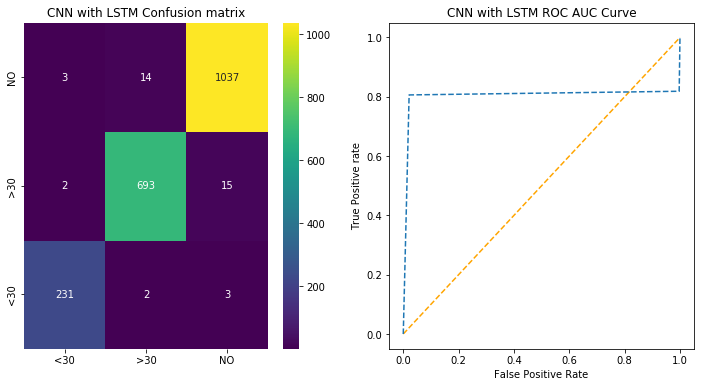

In [24]:
#now perform prediction using CNN with LSTM
predict = cnn_lstm.predict(X_test1) #now perform prediction on test data
predict = np.argmax(predict, axis=1)
y_test2 = np.argmax(y_test1, axis=1)   
calculateMetrics("CNN with LSTM", y_test2, predict)

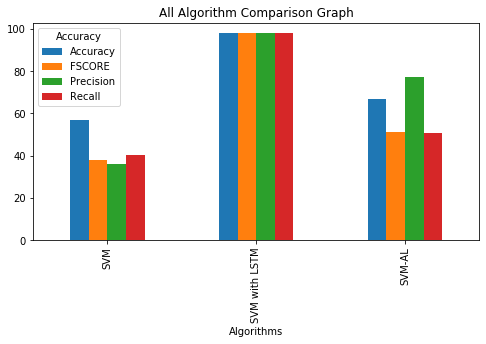

In [25]:
#plot comparison graph between all algorithms
df = pd.DataFrame([['SVM','Accuracy',accuracy[0]],['SVM','Precision',precision[0]],['SVM','Recall',recall[0]],['SVM','FSCORE',fscore[0]],
                   ['SVM-AL','Accuracy',accuracy[1]],['SVM-AL','Precision',precision[1]],['SVM-AL','Recall',recall[1]],['SVM-AL','FSCORE',fscore[1]],
                   ['SVM with LSTM','Accuracy',accuracy[2]],['SVM with LSTM','Precision',precision[2]],['SVM with LSTM','Recall',recall[2]],['SVM with LSTM','FSCORE',fscore[2]],
                  ],columns=['Algorithms','Accuracy','Value'])
df.pivot("Algorithms", "Accuracy", "Value").plot(kind='bar')
plt.title("All Algorithm Comparison Graph")
plt.show()

In [26]:
#diplay all algorithms performance in tabular format
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["SVM", "SVM-AL", "SVM with LSTM"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,SVM,36.284631,40.417190,37.788217,56.85
1,SVM-AL,77.056412,50.856092,51.117876,66.80
2,SVM with LSTM,97.972832,97.958029,97.965407,98.05


In [55]:
#laoding and predicting test data
dataset = pd.read_csv("Dataset/testData.csv", na_values='?')#reading test data
temp = dataset.values
columns = dataset.columns #getting column names and types to convert all non-numeric data to numeric
types = dataset.dtypes.values
index = 0
for i in range(len(types)):#loop all columns and then look for non-numeric and encode to numeric
    name = types[i]
    if name == 'object': #finding column with object type
        dataset[columns[i]] = pd.Series(label_encoder[index].fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric 
        index = index + 1
dataset = dataset.apply(lambda x: x.fillna(x.mean())) #replace missing values with 0 or mean
dataset.fillna(0, inplace = True)
dataset = dataset.values
X = scaler.transform(dataset) #transform dataset for normalization
X = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))#reshape and predict test data
predict = cnn_lstm.predict(X)
for i in range(len(predict)):
    pred = np.argmax(predict[i])
    print("Test Data = "+str(temp[i])+" =====> Predicted As "+str(labels[pred])+"\n")

36
Test Data = [4243080 719487 'AfricanAmerican' 'Female' '[60-70)' nan 6 25 1 10 nan
 'InternalMedicine' 51 2 14 0 0 0 599.0 403.0 996.0 9 'None' 'None' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'] =====> Predicted As >30

Test Data = [4243416 647181 'AfricanAmerican' 'Female' '[70-80)' nan 6 25 7 3 nan
 'InternalMedicine' 36 0 9 0 0 0 435.0 427.0 437.0 8 'None' 'None' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Steady' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'] =====> Predicted As >30

Test Data = [4248912 687978 'Caucasian' 'Male' '[50-60)' nan 6 25 1 3 nan
 'InternalMedicine' 53 1 20 0 0 0 250.22 428.0 403.0 9 'None' 'None' 'No'
 'No' 'No' 'No' 'Steady' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'] =====> Predicted As >30

Test Data = [4251816 6884595 'AfricanAmerican' 'Female' '[10-20)' nan 6 25 7 2 nan
 '